Predict Customer Lifetime VAlue(CLTV). Estimate how much revenue a customer will generate 


- PaymentMoment
- CustomerSupportCall
- CLV
- Churn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../customer_dataset_churnedML.csv")
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,CLV,Churn
0,CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,2765.46,1
1,CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,1423.45,0
2,CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,8119.22,1
3,CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,681.06,1
4,CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,2300.27,1
5,CUST00006,41,Male,3,23.520,77.43,2,Electronics,Bank Transfer,0,1063.24,1
6,CUST00007,18,Female,28,110.340,2651.24,52,Books,Debit Card,4,4528.67,1
7,CUST00008,18,Female,53,58.428,2934.89,62,Electronics,Credit Card,4,3125.09,1
8,CUST00009,18,Male,7,53.088,289.07,4,Home & Garden,PayPal,1,2461.15,1
9,CUST00010,34,Male,7,77.844,445.38,12,Electronics,Credit Card,0,3164.19,1


In [4]:
df.shape

(10700, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            10700 non-null  object 
 1   Age                   10700 non-null  int64  
 2   Gender                10700 non-null  object 
 3   Tenure                10700 non-null  int64  
 4   MonthlySpend          10700 non-null  float64
 5   TotalSpend            10700 non-null  float64
 6   NumTransactions       10700 non-null  int64  
 7   ProductCategory       10700 non-null  object 
 8   PaymentMethod         10700 non-null  object 
 9   CustomerSupportCalls  10700 non-null  int64  
 10  CLV                   10700 non-null  float64
 11  Churn                 10700 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1003.3+ KB


In [6]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
Tenure                  0
MonthlySpend            0
TotalSpend              0
NumTransactions         0
ProductCategory         0
PaymentMethod           0
CustomerSupportCalls    0
CLV                     0
Churn                   0
dtype: int64

In [7]:
corr = df.corr(numeric_only=True)
corr

,Age,Tenure,MonthlySpend,TotalSpend,NumTransactions,CustomerSupportCalls,CLV,Churn
Age,1.000000,-0.003659,-0.061792,0.002210,0.003620,-0.000585,-0.443162,0.008452
Tenure,-0.003659,1.000000,-0.001572,0.788353,0.785971,0.817558,-0.000407,-0.022204
MonthlySpend,-0.061792,-0.001572,1.000000,0.417390,0.416857,-0.001429,0.826443,-0.002699
TotalSpend,0.002210,0.788353,0.417390,1.000000,0.981694,0.643851,0.330730,-0.020156
NumTransactions,0.003620,0.785971,0.416857,0.981694,1.000000,0.643028,0.327217,-0.021528
CustomerSupportCalls,-0.000585,0.817558,-0.001429,0.643851,0.643028,1.000000,-0.001869,-0.012338
CLV,-0.443162,-0.000407,0.826443,0.330730,0.327217,-0.001869,1.000000,-0.008101
Churn,0.008452,-0.022204,-0.002699,-0.020156,-0.021528,-0.012338,-0.008101,1.000000


Text(0.5, 1.0, 'Correlation Map')

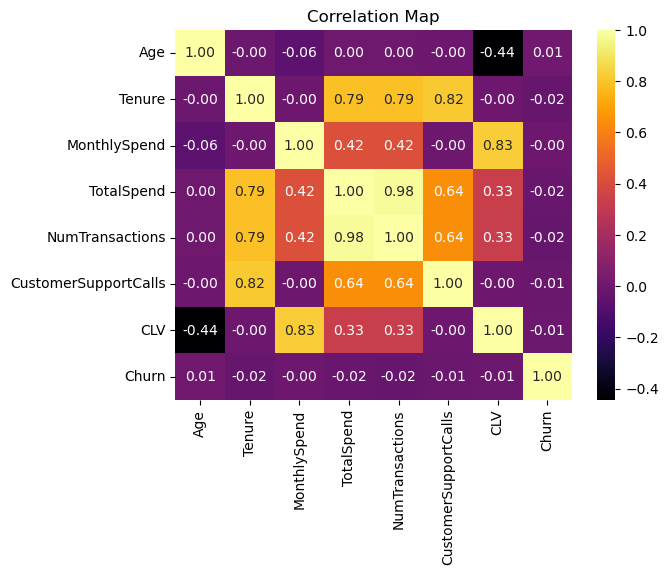

In [8]:

sns.heatmap(corr, annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Map')

<Axes: ylabel='Age'>

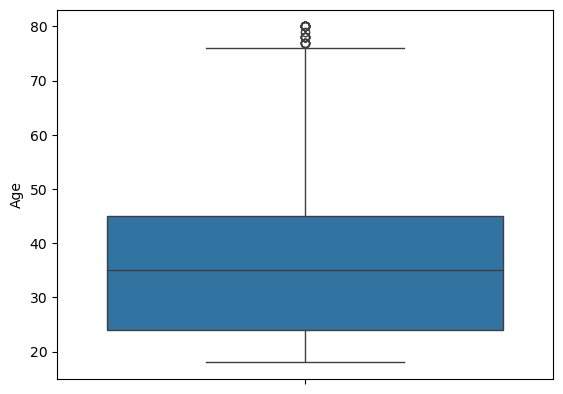

In [9]:
sns.boxplot(df['Age'])



<Axes: ylabel='TotalSpend'>

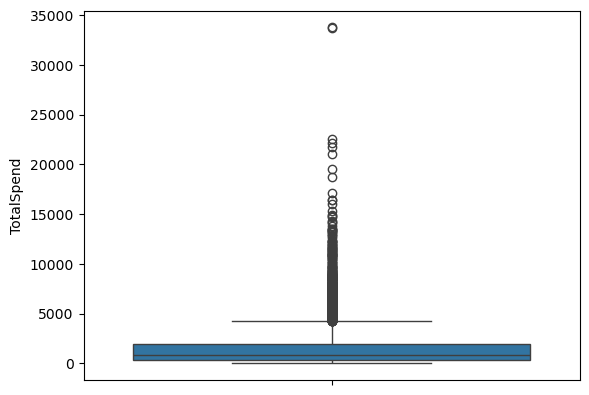

In [10]:
sns.boxplot(df['TotalSpend'])

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

df_dup = df.copy()

In [12]:

df_dup.drop(columns=['Churn'], inplace=True)
df_dup

,CustomerID,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,CLV
0,CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,2765.46
1,CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,1423.45
2,CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,8119.22
3,CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,681.06
4,CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,2300.27
...,...,...,...,...,...,...,...,...,...,...,...
10695,CUST10696,32,Female,2,98.760,172.02,3,Clothing,Bank Transfer,0,3772.77
10696,CUST10697,48,Female,2,123.144,212.13,3,Clothing,Debit Card,0,4608.23
10697,CUST10698,28,Male,36,29.250,1172.51,21,Electronics,Credit Card,3,1389.19
10698,CUST10699,32,Male,42,72.504,2752.83,42,Sports,PayPal,7,3146.34


In [13]:
df_dup.set_index('CustomerID', inplace=True)


In [14]:
df_dup

,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,CLV
CustomerID,,,,,,,,,,
CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,2765.46
CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,1423.45
CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,8119.22
CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,681.06
CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,2300.27
...,...,...,...,...,...,...,...,...,...,...
CUST10696,32,Female,2,98.760,172.02,3,Clothing,Bank Transfer,0,3772.77
CUST10697,48,Female,2,123.144,212.13,3,Clothing,Debit Card,0,4608.23
CUST10698,28,Male,36,29.250,1172.51,21,Electronics,Credit Card,3,1389.19


In [15]:
cat_cols = ['PaymentMethod', 'ProductCategory', 'Gender']
categorical_columns = df_dup[cat_cols]

Encoder = OneHotEncoder()
df_enc = pd.get_dummies(df_dup, columns=categorical_columns.columns)
df_enc.astype(int)

,Age,Tenure,MonthlySpend,TotalSpend,NumTransactions,CustomerSupportCalls,CLV,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Groceries,ProductCategory_Home & Garden,ProductCategory_Sports,Gender_Female,Gender_Male
CustomerID,,,,,,,,,,,,,,,,,,,
CUST00001,42,36,61,1614,27,2,2765,0,0,1,0,1,0,0,0,0,0,0,1
CUST00002,35,3,44,120,3,1,1423,1,0,0,0,0,0,1,0,0,0,0,1
CUST00003,18,2,114,179,2,0,8119,0,1,0,0,0,0,0,0,0,1,1,0
CUST00004,38,20,20,320,14,1,681,1,0,0,0,0,0,1,0,0,0,1,0
CUST00005,48,1,76,70,2,0,2300,0,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST10696,32,2,98,172,3,0,3772,1,0,0,0,0,1,0,0,0,0,1,0
CUST10697,48,2,123,212,3,0,4608,0,0,1,0,0,1,0,0,0,0,1,0
CUST10698,28,36,29,1172,21,3,1389,0,1,0,0,0,0,1,0,0,0,0,1


In [16]:
# Split Data into features

In [17]:
scaler = StandardScaler()
x = df_enc.drop(columns=['CLV'])
y = df_enc['CLV']

x = scaler.fit_transform(x)

In [18]:
x = pd.DataFrame(x)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
print("Train and Test Data Shape\n")

print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

Train and Test Data Shape

x_train: (8560, 18)
y_train: (8560,)
x_test: (2140, 18)
y_test: (2140,)


In [21]:
# Model Train

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
# Model Prediction

In [24]:
y_pred = lr.predict(x_test)

In [25]:
# Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Linear Regression Performance")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

Linear Regression Performance
MAE: 511.73
MSE: 574686.83
R2: 0.84


In [27]:
#Training Score Vs Test Score

print("Train Score vs Test Score")
train_score = lr.score(x_train, y_train)
print(f"Train Score: {train_score:.2f}")

test_score = lr.score(x_test, y_test)
print(f"Test Score: {test_score:.2f}")

Train Score vs Test Score
Train Score: 0.84
Test Score: 0.84


In [28]:
# Random forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [30]:
# RF Model Prediction

In [31]:
# RF Model Evaluation

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)


print("Random Forest Model Performance")
print(f"MAE_RF: {mae_rf:.2f}")
print(f"MSE_RF: {mse_rf:.2f}")
print(f"R2: {r2_rf:.2f}")

Random Forest Model Performance
MAE_RF: 511.73
MSE_RF: 574686.83
R2: 0.84


In [32]:
# print("Train Score vs Test Score")
# train_score = lr.score(x_train, y_train)
# print(f"Train Score: {train_score:.2f}")

# test_score = lr.score(x_test, y_test)
# print(f"Test Score: {test_score:.2f}")

# CLASSIFICATION

In [34]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,CLV,Churn
0,CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,2765.46,1
1,CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,1423.45,0
2,CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,8119.22,1
3,CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,681.06,1
4,CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,2300.27,1
5,CUST00006,41,Male,3,23.520,77.43,2,Electronics,Bank Transfer,0,1063.24,1
6,CUST00007,18,Female,28,110.340,2651.24,52,Books,Debit Card,4,4528.67,1
7,CUST00008,18,Female,53,58.428,2934.89,62,Electronics,Credit Card,4,3125.09,1
8,CUST00009,18,Male,7,53.088,289.07,4,Home & Garden,PayPal,1,2461.15,1
9,CUST00010,34,Male,7,77.844,445.38,12,Electronics,Credit Card,0,3164.19,1


<!-- mETRICS TO MEASURE PEERFORMANCE IN cLASSIFication -->
- Precision
- Accuracy
- Recall
- F1 Score
- confusion_matrix

In [36]:
df_clf = df.copy()
df_clf

,CustomerID,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,CLV,Churn
0,CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,2765.46,1
1,CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,1423.45,0
2,CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,8119.22,1
3,CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,681.06,1
4,CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,2300.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10695,CUST10696,32,Female,2,98.760,172.02,3,Clothing,Bank Transfer,0,3772.77,1
10696,CUST10697,48,Female,2,123.144,212.13,3,Clothing,Debit Card,0,4608.23,0
10697,CUST10698,28,Male,36,29.250,1172.51,21,Electronics,Credit Card,3,1389.19,0
10698,CUST10699,32,Male,42,72.504,2752.83,42,Sports,PayPal,7,3146.34,1


In [37]:
df_clf.drop(columns=['CLV'], inplace=True)

In [38]:
df_clf.set_index('CustomerID', inplace=True)

In [39]:
df_clf

,Age,Gender,Tenure,MonthlySpend,TotalSpend,NumTransactions,ProductCategory,PaymentMethod,CustomerSupportCalls,Churn
CustomerID,,,,,,,,,,
CUST00001,42,Male,36,61.140,1614.54,27,Books,Debit Card,2,1
CUST00002,35,Male,3,44.080,120.24,3,Electronics,Bank Transfer,1,0
CUST00003,18,Female,2,114.672,179.61,2,Sports,Credit Card,0,1
CUST00004,38,Female,20,20.490,320.60,14,Electronics,Bank Transfer,1,1
CUST00005,48,Male,1,76.620,70.19,2,Sports,Debit Card,0,1
...,...,...,...,...,...,...,...,...,...,...
CUST10696,32,Female,2,98.760,172.02,3,Clothing,Bank Transfer,0,1
CUST10697,48,Female,2,123.144,212.13,3,Clothing,Debit Card,0,0
CUST10698,28,Male,36,29.250,1172.51,21,Electronics,Credit Card,3,0


In [40]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlySpend', 'TotalSpend',
       'NumTransactions', 'ProductCategory', 'PaymentMethod',
       'CustomerSupportCalls', 'CLV', 'Churn'],
      dtype='object')

In [41]:
# Encode categorical varibles

In [42]:
cat_cols2 = df_clf[['Gender', 'ProductCategory', 'PaymentMethod']]

df_enc_clf = pd.get_dummies(df_clf, columns=cat_cols2.columns)

df_enc_clf.astype(int)

,Age,Tenure,MonthlySpend,TotalSpend,NumTransactions,CustomerSupportCalls,Churn,Gender_Female,Gender_Male,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Groceries,ProductCategory_Home & Garden,ProductCategory_Sports,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal
CustomerID,,,,,,,,,,,,,,,,,,,
CUST00001,42,36,61,1614,27,2,1,0,1,1,0,0,0,0,0,0,0,1,0
CUST00002,35,3,44,120,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0
CUST00003,18,2,114,179,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0
CUST00004,38,20,20,320,14,1,1,1,0,0,0,1,0,0,0,1,0,0,0
CUST00005,48,1,76,70,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST10696,32,2,98,172,3,0,1,1,0,0,1,0,0,0,0,1,0,0,0
CUST10697,48,2,123,212,3,0,0,1,0,0,1,0,0,0,0,0,0,1,0
CUST10698,28,36,29,1172,21,3,0,0,1,0,0,1,0,0,0,0,1,0,0


In [43]:
# correlation of variables with target 

corr = df_enc_clf.corr(numeric_only=True)
corr

,Age,Tenure,MonthlySpend,TotalSpend,NumTransactions,CustomerSupportCalls,Churn,Gender_Female,Gender_Male,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Groceries,ProductCategory_Home & Garden,ProductCategory_Sports,PaymentMethod_Bank Transfer,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_PayPal
Age,1.000000,-0.003659,-0.061792,0.002210,0.003620,-0.000585,0.008452,0.012972,-0.012972,-0.000350,-0.006694,-0.001851,0.012864,-0.001496,-0.002515,0.009567,-0.018908,0.002895,0.006301
Tenure,-0.003659,1.000000,-0.001572,0.788353,0.785971,0.817558,-0.022204,-0.002709,0.002709,0.007969,0.009801,0.002282,-0.010300,-0.003105,-0.006655,0.006741,0.001881,-0.010066,0.001511
MonthlySpend,-0.061792,-0.001572,1.000000,0.417390,0.416857,-0.001429,-0.002699,-0.004636,0.004636,-0.005511,0.005651,-0.002580,-0.003798,0.008839,-0.002638,0.011066,-0.005051,0.013884,-0.019872
TotalSpend,0.002210,0.788353,0.417390,1.000000,0.981694,0.643851,-0.020156,-0.003663,0.003663,0.014511,0.011873,0.002842,-0.009428,-0.005526,-0.014314,0.009069,-0.002073,0.001583,-0.008536
NumTransactions,0.003620,0.785971,0.416857,0.981694,1.000000,0.643028,-0.021528,-0.002776,0.002776,0.013545,0.012236,-0.000174,-0.008613,-0.003420,-0.013673,0.008205,-0.001677,0.002078,-0.008566
CustomerSupportCalls,-0.000585,0.817558,-0.001429,0.643851,0.643028,1.000000,-0.012338,-0.001360,0.001360,0.009633,0.007186,-0.000100,-0.002273,-0.003321,-0.011198,0.008406,0.000957,-0.007527,-0.001768
Churn,0.008452,-0.022204,-0.002699,-0.020156,-0.021528,-0.012338,1.000000,0.008805,-0.008805,-0.016190,0.008126,0.009107,0.010955,-0.014722,0.002911,0.026487,-0.016303,-0.023905,0.013717
Gender_Female,0.012972,-0.002709,-0.004636,-0.003663,-0.002776,-0.001360,0.008805,1.000000,-1.000000,-0.018011,0.010662,0.020275,-0.007813,-0.003335,-0.001333,-0.004449,0.003114,0.000131,0.001207
Gender_Male,-0.012972,0.002709,0.004636,0.003663,0.002776,0.001360,-0.008805,-1.000000,1.000000,0.018011,-0.010662,-0.020275,0.007813,0.003335,0.001333,0.004449,-0.003114,-0.000131,-0.001207
ProductCategory_Books,-0.000350,0.007969,-0.005511,0.014511,0.013545,0.009633,-0.016190,-0.018011,0.018011,1.000000,-0.203396,-0.196518,-0.202990,-0.202176,-0.202041,-0.009879,-0.004367,0.015236,-0.001105


<Axes: >

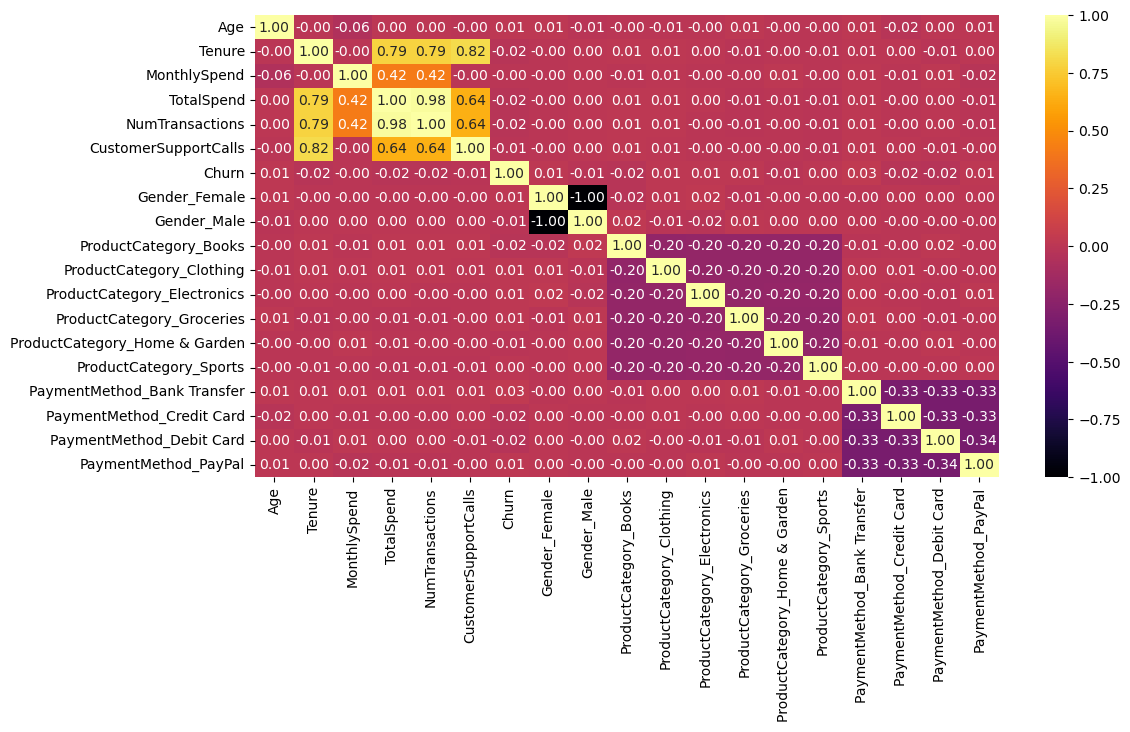

In [44]:
plt.figure(figsize=(12, 6))

sns.heatmap(corr, cmap='inferno', annot=True, fmt=".2f")

In [45]:
# Split data into feature and targetabs

x_clf = df_enc_clf.drop(columns=["Churn"])
y_clf = df_enc_clf['Churn']

In [46]:
#  Normalize numeric feature with standardscaler

scaler = StandardScaler()
x_clf = scaler.fit_transform(x_clf)

In [47]:
x_clf = pd.DataFrame(x_clf)
x_clf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.486713,0.530666,-0.219586,0.085111,-0.057087,0.028844,-0.996827,0.996827,2.216213,-0.450770,-0.435525,-0.449869,-0.448066,-0.447765,-0.574472,-0.569724,1.717073,-0.582818
1,-0.040922,-0.864046,-0.632295,-0.716887,-0.698965,-0.395106,-0.996827,0.996827,-0.451220,-0.450770,2.296080,-0.449869,-0.448066,-0.447765,1.740727,-0.569724,-0.582386,-0.582818
2,-1.322321,-0.906310,1.075442,-0.685023,-0.725710,-0.819056,1.003183,-1.003183,-0.451220,-0.450770,-0.435525,-0.449869,-0.448066,2.233313,-0.574472,1.755236,-0.582386,-0.582818
3,0.185208,-0.145558,-1.202976,-0.609353,-0.404771,-0.395106,1.003183,-1.003183,-0.451220,-0.450770,2.296080,-0.449869,-0.448066,-0.447765,1.740727,-0.569724,-0.582386,-0.582818
4,0.938972,-0.948574,0.154901,-0.743749,-0.725710,-0.819056,-0.996827,0.996827,-0.451220,-0.450770,-0.435525,-0.449869,-0.448066,2.233313,-0.574472,-0.569724,1.717073,-0.582818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,-0.267051,-0.906310,0.690504,-0.689096,-0.698965,-0.819056,1.003183,-1.003183,-0.451220,2.218427,-0.435525,-0.449869,-0.448066,-0.447765,1.740727,-0.569724,-0.582386,-0.582818
10696,0.938972,-0.906310,1.280393,-0.667569,-0.698965,-0.819056,1.003183,-1.003183,-0.451220,2.218427,-0.435525,-0.449869,-0.448066,-0.447765,-0.574472,-0.569724,1.717073,-0.582818
10697,-0.568557,0.530666,-0.991057,-0.152128,-0.217556,0.452795,-0.996827,0.996827,-0.451220,-0.450770,2.296080,-0.449869,-0.448066,-0.447765,-0.574472,1.755236,-0.582386,-0.582818
10698,-0.267051,0.784250,0.055328,0.696037,0.344087,2.148596,-0.996827,0.996827,-0.451220,-0.450770,-0.435525,-0.449869,-0.448066,2.233313,-0.574472,-0.569724,-0.582386,1.715801


In [48]:
# Divide data into train_test_split

In [49]:
from sklearn.model_selection import train_test_split

x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42)

In [50]:
print("T")

print(f"x_train: {x_train_clf.shape}")
print(f"y_train: {y_train_clf.shape}")
print(f"x_test: {x_test_clf.shape}")
print(f"y_test: {y_test_clf.shape}")

T
x_train: (8560, 18)
y_train: (8560,)
x_test: (2140, 18)
y_test: (2140,)


In [51]:
# Model Training with Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg = LinearRegression()
log_reg.fit(x_train_clf, y_train_clf)

LinearRegression()

In [54]:
y_pred_clf = log_reg.predict(x_test_clf)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("Accuracy Score:", accuracy_score(y_test_clf, y_pred_clf))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print("Logistic Regression Classification Report")

print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

In [ ]:
print("Logistic Regression Confusion Matrix")

print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))